<a href="https://colab.research.google.com/github/NicolasSocquetJuglard/TP4_ML/blob/main/codeNico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.utils import dataset_utils
from keras.utils import image_utils
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense


In [4]:
import pathlib
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [7]:
#path toward the images

path = '/content/drive/MyDrive/Colab/cats_and_dogs'
path_train = path + '/train'
path_test = path + '/test'

In [8]:
train_datagen =  keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.15,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    preprocessing_function = preprocess_input,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        path_train,
        target_size = (300, 300),
        batch_size = 16,
        shuffle = True)

test_generator = test_datagen.flow_from_directory(
        path_test,
        target_size = (300, 300),
        batch_size = 16,
        shuffle = True)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [9]:
base_model_1 = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (300, 300, 3))

In [10]:
#Freezing all layers

for layer in base_model_1.layers:
  layer.trainable = False

In [11]:
x1 = base_model_1.output
x1 = Flatten()(x1)
x1 = Dense(100, activation = 'relu')(x1)
predictions1 = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x1)

In [12]:
#Building model
model1 = Model(inputs = base_model_1.input, outputs = predictions1)

#Compiling model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model1.fit(x = train_generator, validation_data = test_generator, epochs = 2)

Epoch 1/2
35/35 [==============================] - 154s 4s/step - loss: 0.8198 - accuracy: 0.9408 - val_loss: 0.7584 - val_accuracy: 0.9500
Epoch 2/2
27/35 [======================>.......] - ETA: 29s - loss: 0.2049 - accuracy: 0.9720

In [13]:
# View all the layers of the network

model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

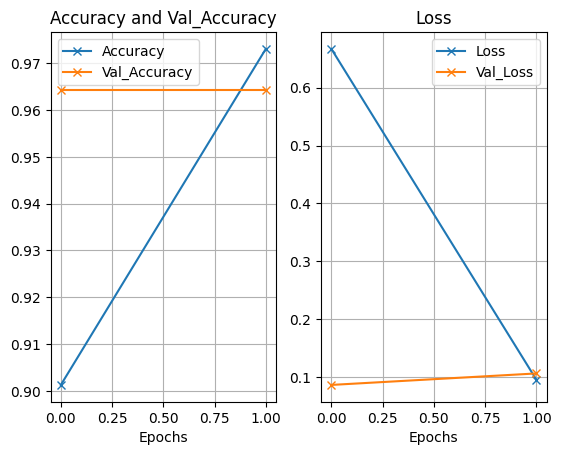

In [12]:
#Evaluating 

acc, val_acc = hist.history['accuracy'], hist.history['val_accuracy']
loss, val_loss = hist.history['loss'], hist.history['val_loss']

epochs = hist.epoch

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-x', label = 'Accuracy')
plt.plot(epochs, val_acc, '-x', label = 'Val_Accuracy')
plt.grid(True)
plt.title("Accuracy and Val_Accuracy")
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-x', label = 'Loss')
plt.plot(epochs, val_loss, '-x', label = 'Val_Loss')
plt.grid(True)
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

Il reste :

-Confusion matrix

-Print metrics such as accuracy, f1-score etc... on test set

Step 2 :

Repeat the step 1 with another model, compare and choose the best model

In [17]:
base_model_2 = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

In [19]:
for layer in base_model_2.layers:
    layer.trainable = False

In [24]:
x2 = base_model_2.output
x2 = keras.layers.Flatten()(x2)
x2 = keras.layers.Dense(100, activation='relu')(x2)
predictions2 = keras.layers.Dense(2, activation='softmax', kernel_initializer='random_uniform')(x2)

In [ ]:
#Building model
model2 = Model(inputs = base_model_2.input, outputs = predictions2)

#Compiling model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# View all the layers of the network

model2.summary()

In [ ]:
hist = model2.fit(x = train_generator, validation_data = test_generator, epochs = 2)